<a href="https://colab.research.google.com/github/AatkaMeraj/Porter-NN-Regression/blob/main/Porter_NN_Regression_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

**Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers**

**Porter works with a wide range of restaurants for delivering their items directly to the people.**

**Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.**

**This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features**

# Importing Libraries and Downloading Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l1_l2

from tensorflow.keras.optimizers import Adam

from warnings import filterwarnings
filterwarnings('ignore')



In [ ]:
df= pd.read_csv('/content/drive/MyDrive/dataset.csv')

# Basic EDA

In [ ]:
df.head(10)


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0


In [ ]:
df.shape

(197428, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


# Null values Treatment

In [ ]:
# checking for nulls

df.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


**There are some Nulls in the dataset, so we need to drop them.**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [ ]:
df.shape

(176248, 14)

# Feature Engineering

**Delivery time calculation**

In [ ]:
# converting the columns created_at and actual_delivery_time

df['created_at']= pd.to_datetime(df['created_at'])
df['actual_delivery_time']= pd.to_datetime(df['actual_delivery_time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 176248 non-null  float64       
 1   created_at                176248 non-null  datetime64[ns]
 2   actual_delivery_time      176248 non-null  datetime64[ns]
 3   store_id                  176248 non-null  object        
 4   store_primary_category    176248 non-null  object        
 5   order_protocol            176248 non-null  float64       
 6   total_items               176248 non-null  int64         
 7   subtotal                  176248 non-null  int64         
 8   num_distinct_items        176248 non-null  int64         
 9   min_item_price            176248 non-null  int64         
 10  max_item_price            176248 non-null  int64         
 11  total_onshift_partners    176248 non-null  float64       
 12  total_b

In [ ]:
# calculating delivery time taken from the columns created_at and actual_delivery_time

df['time_taken'] = df['actual_delivery_time'] - df['created_at']

In [ ]:
# delivery time in mins

df['time_taken_mins'] = df['time_taken'].dt.total_seconds() / 60

**Hour and Weekday of the Order**

In [ ]:
# getting hour and day of the week from the column created_at

df['hour']= df['created_at'].dt.hour
df['weekday']= df['created_at'].dt.weekday

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken,time_taken_mins,hour,weekday
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59,62.983333,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04,67.066667,21,1
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,0 days 00:26:26,26.433333,0,0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,0 days 00:37:53,37.883333,3,3
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,0 days 00:49:48,49.800000,2,1


In [ ]:
# dropping the columns created_at, actual_delivery_time , time_taken

df.drop(['created_at', 'actual_delivery_time', 'time_taken', 'store_id'], axis=1, inplace=True)

In [ ]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins,hour,weekday
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
8,2.0,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0
14,1.0,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3
15,1.0,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1


# Encoding of Categorical columns

In [ ]:
# encoding of column store_primary_category

df['store_primary_category'] = df['store_primary_category'].astype('category')
df['store_primary_category'] = df['store_primary_category'].cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_primary_category    176248 non-null  int8   
 2   order_protocol            176248 non-null  float64
 3   total_items               176248 non-null  int64  
 4   subtotal                  176248 non-null  int64  
 5   num_distinct_items        176248 non-null  int64  
 6   min_item_price            176248 non-null  int64  
 7   max_item_price            176248 non-null  int64  
 8   total_onshift_partners    176248 non-null  float64
 9   total_busy_partners       176248 non-null  float64
 10  total_outstanding_orders  176248 non-null  float64
 11  time_taken_mins           176248 non-null  float64
 12  hour                      176248 non-null  int32  
 13  weekday                   176248 non-null  int32 

In [ ]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_mins,hour,weekday
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,22,4
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,21,1
8,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0
14,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3
15,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,2,1


# Outlier Handling


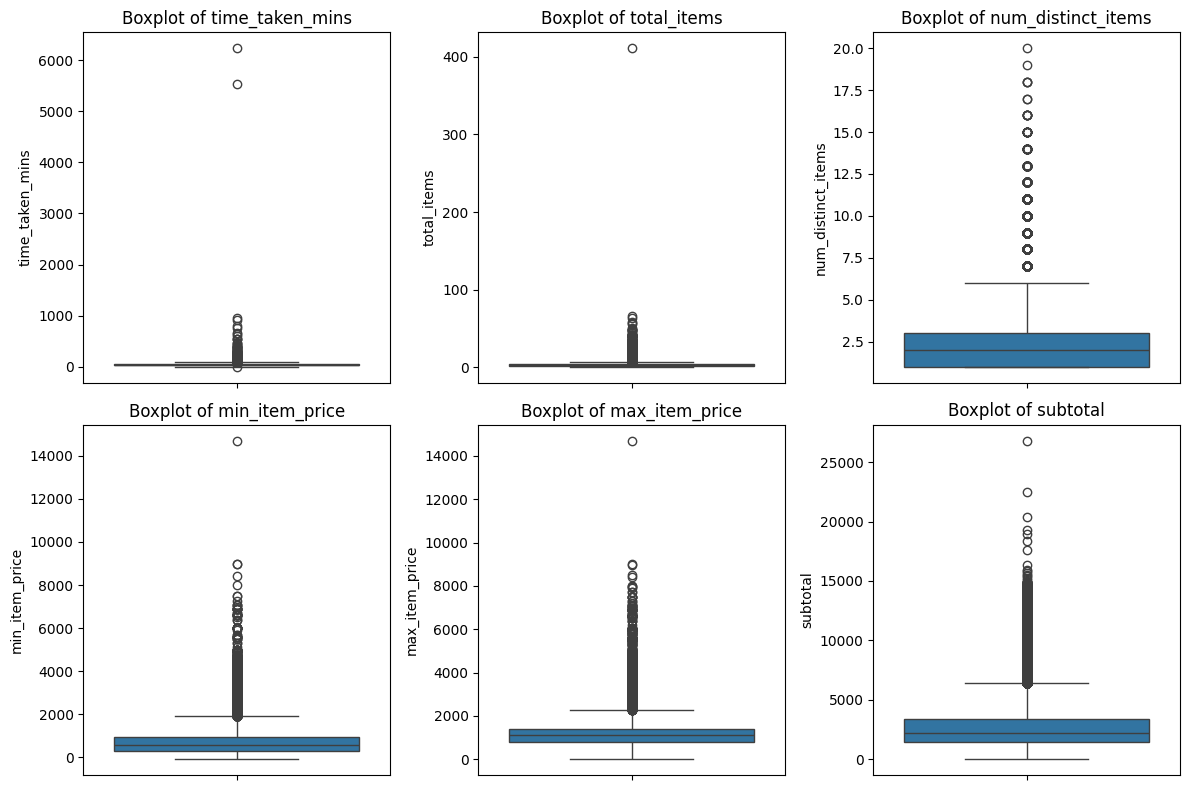

In [ ]:
# Outlier check using Boxplot

columns= ['time_taken_mins', 'total_items', 'num_distinct_items','min_item_price', 'max_item_price', 'subtotal']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

axes = axes.flatten()

for ax, var in zip(axes, columns):
    sns.boxplot(data=df, y=var, ax=ax)
    ax.set_title(f'Boxplot of {var}')
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

**There are some outliers in the dataset.**

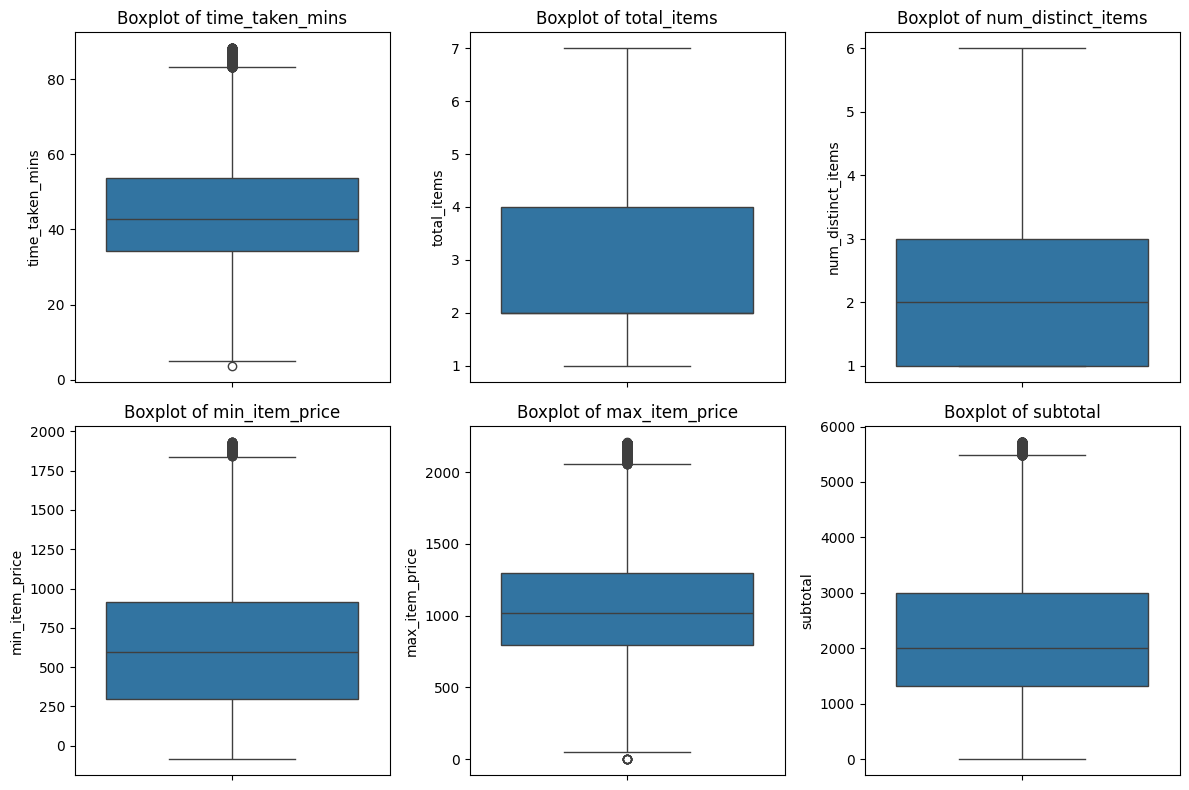

In [ ]:
# removing outliers using IQR

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Now plot the boxplots for the filtered data

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for ax, var in zip(axes, columns):
    sns.boxplot(data=df, y=var, ax=ax)
    ax.set_title(f'Boxplot of {var}')
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()


**After applying IQR, most of the outliers are removed.**

# Visualizations

In [ ]:
# heatmap for correlation between features

corr=df.corr()

<Axes: >

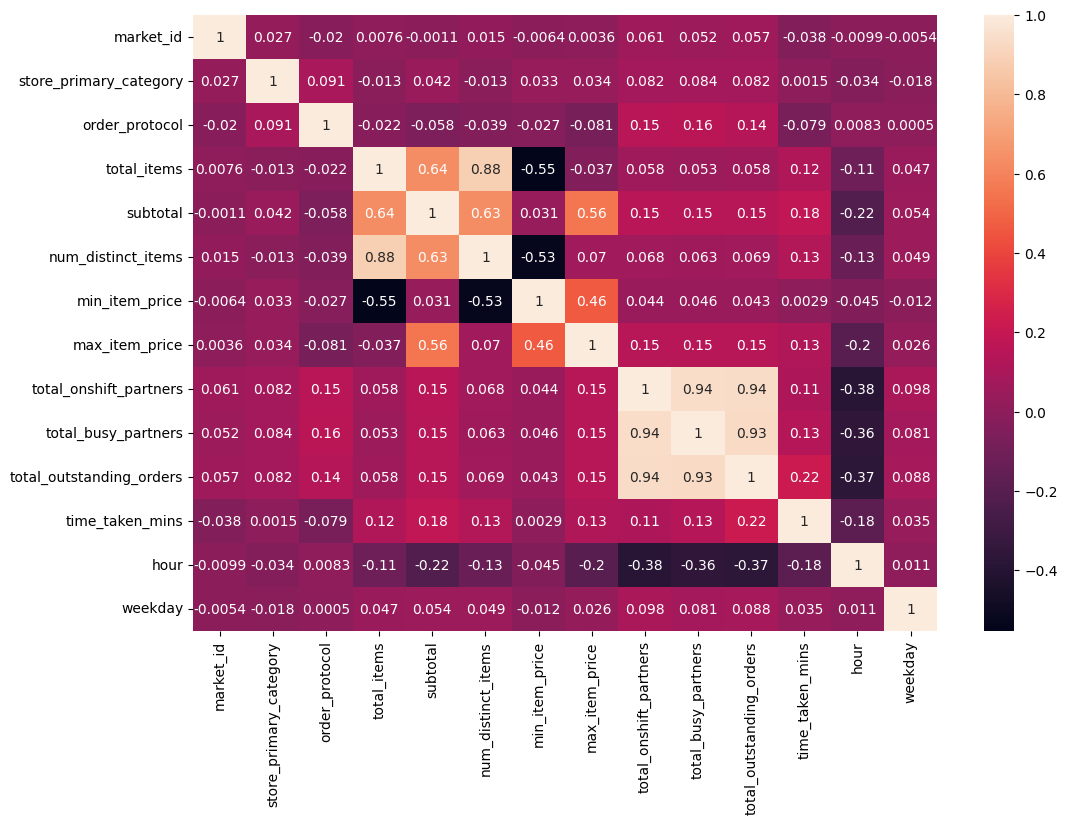

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

**The target column is closely correlated to total_outstanding _orders, subtotal, num_distinct_items and total_items.**

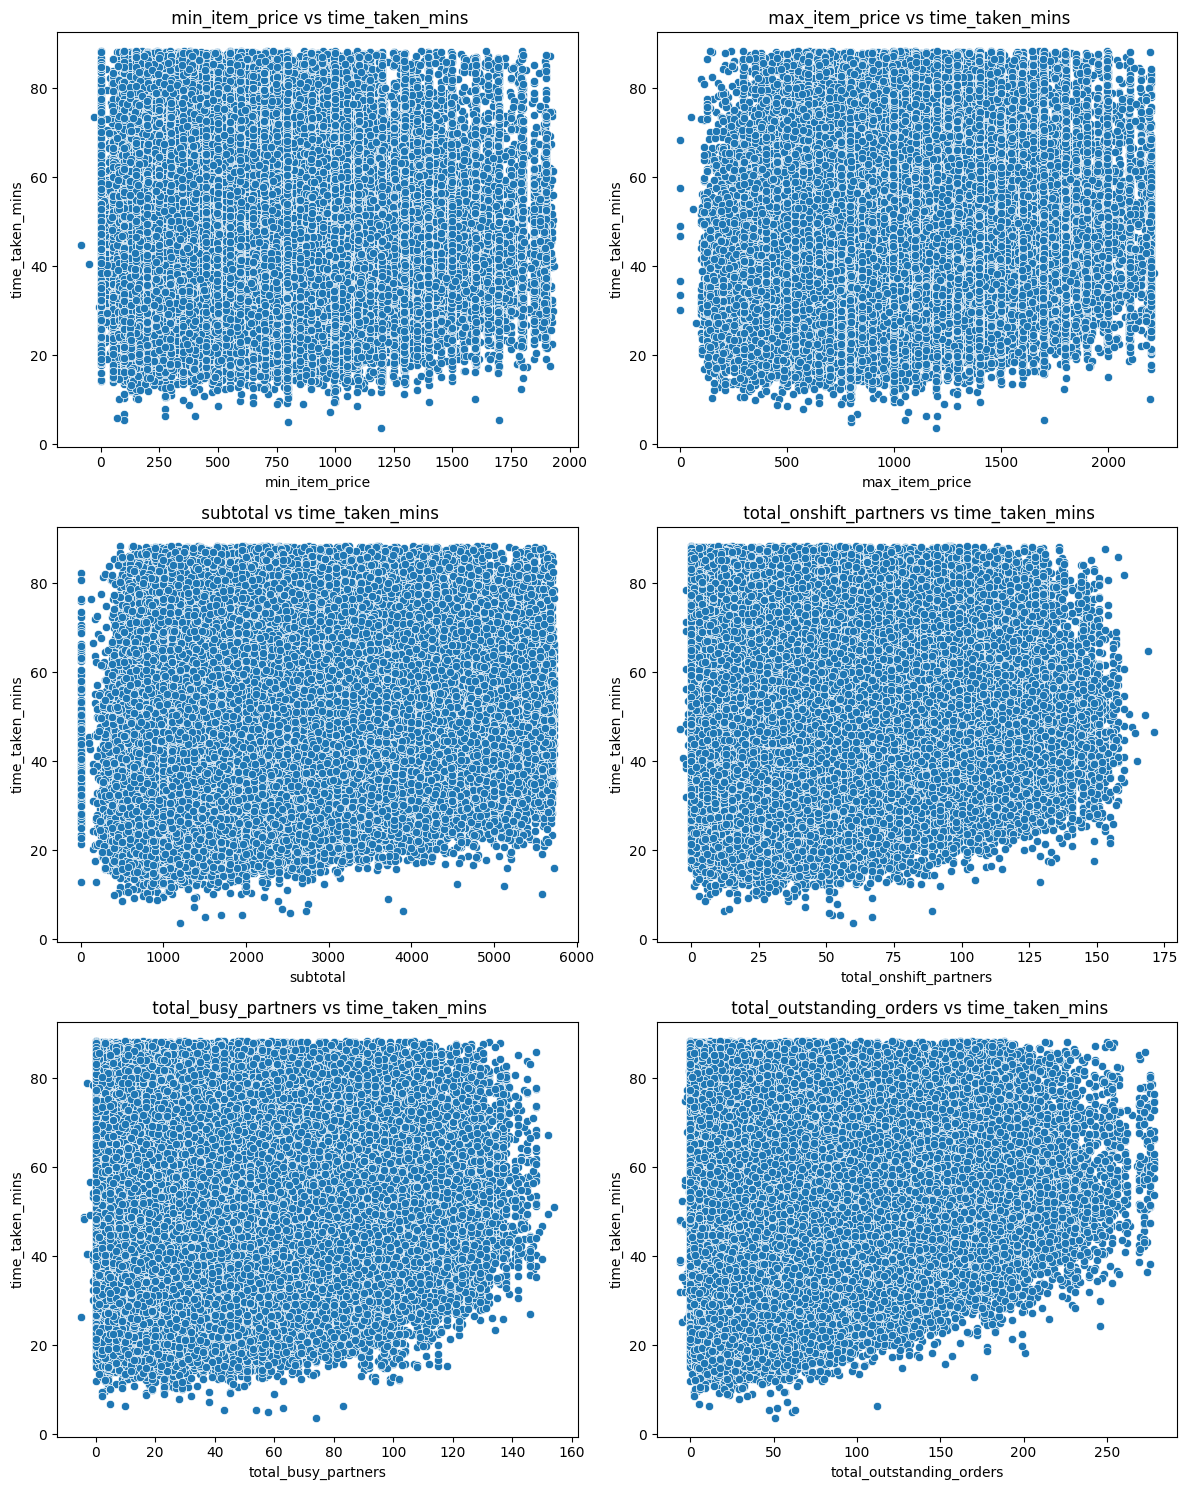

In [ ]:
# scatter plot of numerical columns vs time_taken_mins

numeric_columns = [ 'min_item_price', 'max_item_price', 'subtotal',
                  'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']



fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten()

for ax, var in zip(axes, numeric_columns):
    sns.scatterplot(data=df, x=var, y='time_taken_mins', ax=ax)
    ax.set_title(f' {var} vs time_taken_mins')
    ax.set_ylabel('time_taken_mins')


plt.tight_layout()
plt.show()

**The scatterplots with various columns shows that there is no strong correlation between the two variables. The points are scattered without a clear pattern, and doesnt shows any clear increasing or decreasing trend.**

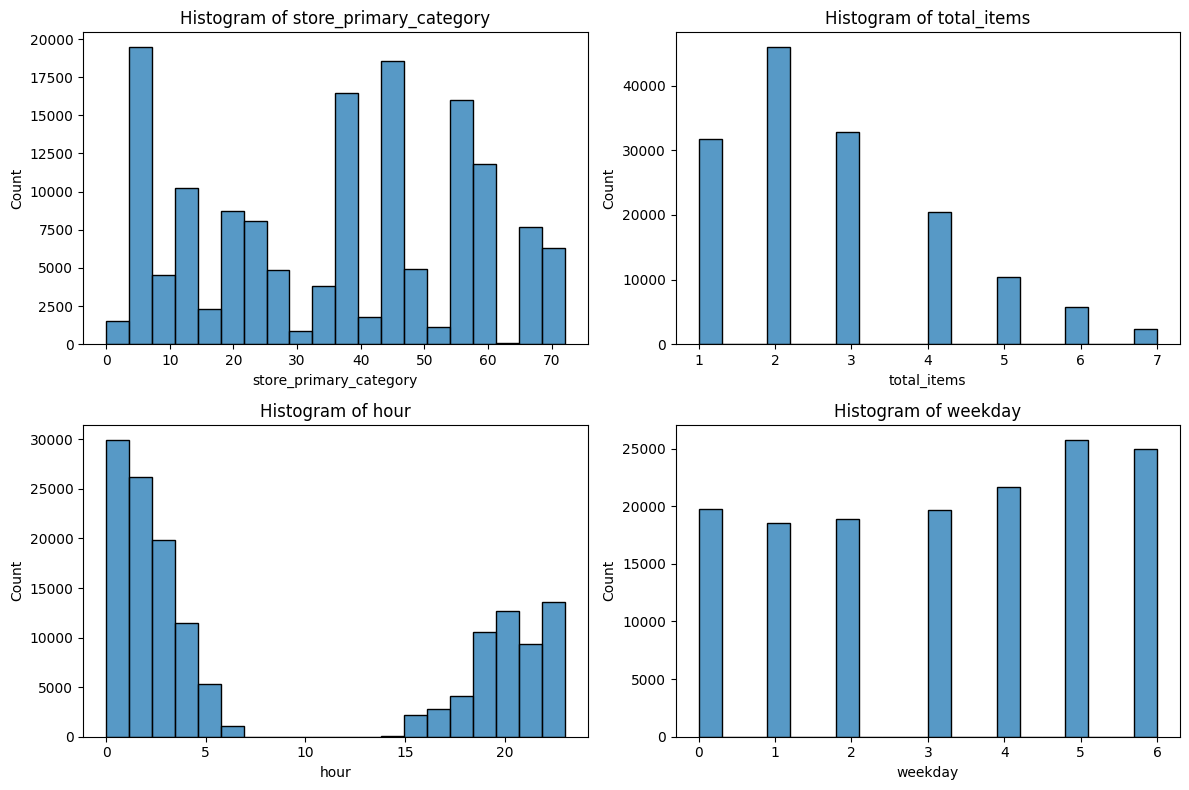

In [ ]:
columns = [ 'store_primary_category','total_items', 'hour', 'weekday' ]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for ax, var in zip(axes, columns):
    sns.histplot(data=df, x=var, bins=20, ax=ax)
    ax.set_title(f'Histogram of {var}')
    ax.set_ylabel('Count')


plt.tight_layout()
plt.show()

**Store category of 4 has the highest number of orders.**

**Most of the people have bought 2 items together.**

**The time of orders is mostly around 1 or 2 at night.**

**Most of the orders are made on Saturdays and Sundays.**

# Model Building


In [ ]:
# train test split

y = df['time_taken_mins']
x = df.drop('time_taken_mins', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [ ]:
x_train.shape

(119376, 13)

In [ ]:
y_train.shape

(119376,)

In [ ]:

scaler= StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-1.32196587, -1.5287029 , -1.27128474, ..., -1.05723137,
        -0.44267026, -0.10723221],
       [ 1.68686643, -0.38031668,  0.70376552, ..., -1.05723137,
        -0.44267026, -1.58785279],
       [ 0.18245028, -0.38031668,  0.70376552, ..., -0.94184243,
         1.26769744, -1.58785279],
       ...,
       [-1.32196587,  0.09817758,  0.04541543, ..., -1.09569435,
        -0.67071928,  1.37338837],
       [-1.32196587,  0.14602701,  1.36211561, ..., -0.05719393,
        -0.89876831, -0.6007724 ],
       [-1.32196587, -1.24160634, -1.27128474, ...,  0.32743585,
        -0.67071928,  1.37338837]])

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 3: Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(x_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Optionally: Feature importance
importances = model.feature_importances_
print(f"Feature Importances: {importances}")


Mean Squared Error: 159.41667828035207
Mean Absolute Error: 9.981751495079072
Feature Importances: [0.03220348 0.07799848 0.03985823 0.02047528 0.13272194 0.02075181
 0.09721889 0.09867401 0.11232531 0.07511782 0.13381692 0.09997617
 0.05886166]


In [ ]:
r2_score(y_test, y_pred)

0.2474115743096429

**When using Random Forest regressor, we are getting the R2 score as low as 25% on the test data, without any tuning. So we will try to increase it using the NN regressor model.**

In [ ]:
# base NN regression model

# initialize the model
model = Sequential()

# add the layers and neurons
model.add(Dense(256, input_dim=13, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(1))

# compile the model
adam=Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])


In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 695.8123 - mae: 17.6207 - mape: 41.3254 - mse: 695.8123 - val_loss: 313.8837 - val_mae: 13.4351 - val_mape: 28.2032 - val_mse: 313.8837
Epoch 2/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 267.8263 - mae: 12.8005 - mape: 30.3395 - mse: 267.8263 - val_loss: 247.9600 - val_mae: 11.9945 - val_mape: 26.5298 - val_mse: 247.9600
Epoch 3/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 236.5933 - mae: 12.0593 - mape: 28.9569 - mse: 236.5933 - val_loss: 223.5943 - val_mae: 11.8903 - val_mape: 29.6565 - val_mse: 223.5943
Epoch 4/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 230.9360 - mae: 11.9384 - mape: 28.7015 - mse: 230.9360 - val_loss: 226.5097 - val_mae: 11.4783 - val_mape: 25.7035 - val_mse: 226.5097
Epoch 5/20
747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 216.8607 - mae: 11.5632 - mape: 28.0351 - mse: 216.8607 - val_loss: 204.0049 - val_mae: 11.1843 - val_mape: 26.9663 - val_mse: 204.0049
Epoch 6/20
747/747 ━

In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 256)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,405 (525.02 KB)

 Trainable params: 44,801 (175.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,604 (350.02 KB)

In [ ]:
# predict on test data

y_pred= model.predict(x_test)

933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# checking the r2_score of the regression model

r2_score(y_test, y_pred)

0.10507401301878971

In [ ]:
# Evaluate the model on the test set
test_loss, test_mse, test_mae, test_mape = model.evaluate(x_test, y_test)
print(f"Test MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}")

933/933 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 187.2205 - mae: 11.0099 - mape: 28.0988 - mse: 187.2205
Test MSE: 189.5673
Test MAE: 11.0794
Test MAPE: 28.2651


**The score is not good, so we hyperparameterize the model to find the best hyperparameters.**

In [ ]:
# code to hypermeterize the model

# Function to create the model
def create_model(neurons=32, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=13, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1))  # Output layer
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mape'])
    return model

# Hyperparameter grid
neurons_grid = [32, 64, 128]
learning_rate_grid = [0.001, 0.01, 0.1]
batch_size_grid = [32, 64, 128]
epochs_grid = [10, 20, 30]


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

best_mse = float('inf')
best_params = {}

# Manual grid search
for neurons in neurons_grid:
    for learning_rate in learning_rate_grid:
        for batch_size in batch_size_grid:
            for epochs in epochs_grid:
                # Create and train the model
                model = create_model(neurons=neurons, learning_rate=learning_rate)
                model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Evaluate the model
                y_pred = model.predict(x_test)
                mse = mean_squared_error(y_test, y_pred)

                # If this model is better, store the parameters and score
                if mse < best_mse:
                    best_mse = mse
                    best_params = {
                        'neurons': neurons,
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'epochs': epochs
                    }

# Print the best parameters and the corresponding score
print(f"Best parameters: {best_params}")
print(f"Best MSE: {best_mse}")


933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
933/933 ━━━━━━━━

**The best hyperparameters given by the model is**
**'neurons': 128, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30**

**And the best MSE is around 169.32**

In [ ]:
# training the model based on best parameters

# Define the best hyperparameters
neurons = 128
learning_rate = 0.001
batch_size = 64
epochs = 50


# Function to create and compile the model
def create_model():
    model2 = Sequential()
    model2.add(Dense(neurons, input_dim=x_train.shape[1], activation='relu',  kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)))
    model2.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)))
    model2.add(Dense(64, activation='relu',  kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)) )

    model2.add(Dense(1))

    checkpoint = tf.keras.callbacks.ModelCheckpoint("CNN_best.keras", save_best_only = True)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10, restore_best_weights = True )

    optimizer = Adam(learning_rate=learning_rate) # initializing the optimizer

    model2.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae', 'mape']) # compiling the model
    return model2

# Create the model
model2 = create_model()



In [ ]:
# Train the model on best hyperparameters

history = model2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)


Epoch 1/50
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 426.3458 - mae: 15.4556 - mape: 36.1704 - mse: 426.1883 - val_loss: 294.0667 - val_mae: 13.0983 - val_mape: 28.0284 - val_mse: 293.9181
Epoch 2/50
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 253.1389 - mae: 12.4572 - mape: 29.6390 - mse: 252.9885 - val_loss: 236.3470 - val_mae: 11.6541 - val_mape: 25.6698 - val_mse: 236.1931
Epoch 3/50
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 226.0184 - mae: 11.7858 - mape: 28.3063 - mse: 225.8636 - val_loss: 226.4834 - val_mae: 12.1547 - val_mape: 31.3524 - val_mse: 226.3272
Epoch 4/50
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 213.6653 - mae: 11.4744 - mape: 27.7666 - mse: 213.5085 - val_loss: 224.2404 - val_mae: 11.3396 - val_mape: 24.9471 - val_mse: 224.0828
Epoch 5/50
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 206.8446 - mae: 11.2944 - mape: 27.3360 - mse: 206.6867 - val_loss: 226.1104 - val_mae: 11.3937 - val_mape: 24.8004 - val_mse: 225.9521
Epoch 6/5

In [ ]:
# Make predictions
y_pred = model2.predict(x_test)

933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:

# Evaluate the model on the test set
test_loss, test_mse, test_mae, test_mape = model2.evaluate(x_test, y_test)
print(f"Test MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test MAPE: {test_mape:.4f}")

933/933 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 169.7211 - mae: 10.1830 - mape: 24.5950 - mse: 169.6718
Test MSE: 170.9492
Test MAE: 10.2107
Test MAPE: 24.6447


**After using hyperparameters and regularization we are able to reduce the MAPE by 4%.**

# INSIGHTS

**The target column is closely correlated to total_outstanding _orders, subtotal, num_distinct_items and total_items.**

**Store category of 4 has the highest number of orders.**

**Most of the people have bought 2 items together.**

**The time of orders is mostly around 1 or 2 at night.**

**Most of the orders are made on Saturdays and Sundays.**

**The Random Forset model has not performed better than the Neural Network model. The R2 score is less than the base NN model.**

**After hyperparameter tuning and Regularization, we were able to reduce the MAPE of the NN model by 4%.**




# QUESTIONNAIRE

### Defining the problem statements and where can this and modifications of this be used?

Porter has multiple delivery partners available to transport food from different restaurants. They need to predict an estimated delivery time that can be provided to customers, considering factors like the specific order, the restaurant location, and the availability of delivery partners. This challenge of estimating delivery time is applicable to various companies, especially those involved in online food delivery (such as Swiggy, Zomato, ONDC) and grocery delivery services (like Blinkit, BigBasket, and Dunzo). In fact, this problem is a fundamental aspect of all intra-city delivery services.

### List 3 functions the pandas datetime provides with one line explanation.

1. **pd.to_datetime()**: Converts a string or another object into a datetime object.
2. **pd.datetime().dt.hour**: Extracts the hour component from a datetime object.
3. **pd.datetime().dt.dayofweek**: Returns the day of the week from a datetime object.

### Short note on datetime, timedelta, time span (period)
- **Datetime**: A datetime object captures a specific date and time and is created using the `datetime()` function, which can accept inputs like year, month, day, hour, minute, second, and microsecond.
- **Timedelta**: A timedelta object represents a period of time and can be created using the `timedelta()` function, allowing input of durations in terms of seconds, minutes, hours, days, and more.
- **Time Span (Period)**: A time span, also known as a period, is a range of time and can be represented by two datetime objects or a combination of a datetime object and a timedelta object.

### Why do we need to check for outliers in our data?
Outliers are data points that significantly deviate from the rest of the dataset. They can result from various causes, such as data entry errors, and can distort the outcomes of statistical analyses, making it difficult to reach reliable conclusions.

**Reasons to check for outliers include**:
- **Skewed analysis**: Outliers can distort statistics like the mean, median, and standard deviation, potentially leading to incorrect results.
- **Complicated interpretation**: Outliers can obscure the underlying patterns in the data, making it harder to interpret the true nature of the data.
- **Data entry errors**: Outliers might indicate mistakes in data entry, which should be identified and corrected before performing analysis.

### Name 3 outlier removal methods?
1. **Visual Inspection**: Outliers can often be detected by plotting data and identifying any points that significantly differ from the rest.
2. **Statistical Tests**: Methods like the Interquartile Range (IQR) and Z-score can be used to identify outliers based on their statistical properties.
3. **Expert Judgment**: In some cases, expert knowledge may be needed to recognize outliers, particularly with complex data.

Once identified, outliers can be handled in different ways:
- **Ignore**: If outliers are due to minor data entry errors, they can sometimes be ignored.
- **Remove**: If outliers do not represent the general trend of the data, they can be excluded from analysis.
- **Retain**: If the outliers are genuine data points, they can be kept, though their impact on the analysis should be carefully considered.

### What classical machine learning methods can we use for this problem?
- **Linear Regression**: A straightforward approach that fits a line to the data and predicts continuous outcomes.
- **Decision Trees**: Non-parametric models that split the data into subsets and make predictions based on these splits.
- **Support Vector Machines (SVMs)**: A versatile algorithm that can be used for both regression and classification by finding a boundary that minimizes prediction errors.
- **Naive Bayes**: Although primarily used for classification, it can also be applied to regression by assuming that each feature contributes independently to the outcome.

### Why is scaling required for neural networks?
Scaling data is crucial for neural networks as it improves model accuracy and stability. When input data isn't scaled, the network may struggle to learn relationships between features effectively, leading to inaccurate predictions and unstable training.

**Benefits of scaling data include**:
- **Improved accuracy**: Scaling creates consistent data, making it easier for the model to learn.
- **Increased stability**: Scaling reduces the model's sensitivity to input data variations.
- **Reduced training time**: Scaled data allows for faster and more efficient training.

Overall, scaling data is essential for boosting neural network performance.

### Briefly explain your choice of optimizer
I chose the Adam optimizer because it is widely used and effective for deep learning tasks. Adam combines the strengths of the AdaGrad and RMSProp optimizers and works well across various tasks, including image recognition, natural language processing, and more.

**Advantages of Adam**:
- Fast and efficient
- Effective for diverse tasks
- Easy to implement and tune

### Which activation function did you use and why?
I utilized the ReLU (Rectified Linear Unit) activation function in my deep learning model. ReLU is a non-linear function that is popular in deep learning due to its simplicity and effectiveness.

**Advantages of ReLU**:
- Fast and efficient to compute
- Well-suited for a wide range of tasks
- Simple to implement

### Why does a neural network perform well on a large dataset?
Neural networks perform well on large datasets because they can capture complex patterns and relationships in the data. The many parameters within a neural network allow it to model intricate functions. Training on large datasets enables the network to learn more effectively and make better predictions.

**Key reasons include**:
- **More data, more learning**: Larger datasets provide more information, allowing the network to better capture complex patterns.
- **Noise reduction**: Large datasets help average out noise, allowing the network to focus on true underlying patterns.
- **Better generalization**: More data helps the network generalize better to new, unseen data, improving predictive performance.